In [2]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as po

In [2]:
df=pd.read_csv('C:/Users/User/Downloads/result_df.csv',encoding='utf-8')
df

,Unnamed: 0.1,Unnamed: 0,회원번호,남녀구분코드,연령,소지여부_신용,입회일자_신용,입회경과개월수_신용,탈회여부,회원여부_연체,...,Frequency_s,Monetary_s,labels_k,Recency_8,Frequency_8,Monetary_8,RFM_Score,RFM_Class,고객구분_New,prediction
0,6,6,w8NeFjRo,2,38,1,20170609,19,1,0,...,0.025141,0.001804,1,8,5,4,61.056236,잠재충성고객,간헐,연속
1,9,9,OdlqFy2F,2,42,1,20100816,101,0,0,...,0.017980,0.003194,1,8,4,7,64.671510,잠재충성고객,간헐,연속
2,11,11,PjmGznTm,1,45,1,19950524,284,0,0,...,0.026665,0.001722,1,8,5,4,61.056236,잠재충성고객,간헐,연속
3,16,16,Os3UUS88,1,80,1,20171128,14,0,0,...,0.032759,0.001639,1,8,5,4,61.056236,잠재충성고객,간헐,연속
4,25,25,CRX23tPQ,1,34,1,20170921,16,1,0,...,0.025598,0.001177,1,8,5,3,57.226267,놓치면안될고객,간헐,연속
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69384,299982,299982,g7KF9R6g,1,56,1,20150903,40,1,0,...,0.027579,0.001671,1,8,5,4,61.056236,잠재충성고객,간헐,연속
69385,299983,299983,Tp3muDcV,1,55,1,20160219,35,0,0,...,0.035654,0.001837,1,8,5,5,64.886204,잠재충성고객,간헐,연속
69386,299986,299986,4n8aFEwI,1,45,1,20071017,135,0,0,...,0.037635,0.002943,1,8,5,6,68.716172,잠재충성고객,간헐,연속
69387,299996,299996,EDQYlTTX,2,69,1,20150417,45,0,0,...,0.021332,0.001770,1,8,4,4,53.181605,놓치면안될고객,간헐,연속


In [3]:
df['prediction'].value_counts()

연속    54947
휴면    14442
Name: prediction, dtype: int64

In [4]:
df1=df[df['prediction']=='연속']

In [5]:
df2 = df1.sample(n=10000, random_state=42)

In [6]:
df3=df2[[  '쇼핑_도소매_이용금액','쇼핑_백화점_이용금액' , '쇼핑_마트_이용금액',  '쇼핑_슈퍼마켓_이용금액' ,'쇼핑_편의점_이용금액' , '쇼핑_아울렛_이용금액' , '쇼핑_온라인_이용금액' , 
'쇼핑_기타_이용금액' ,   '교통_주유이용금액' ,'교통_정비이용금액' ,'교통_통행료이용금액' ,'교통_버스지하철이용금액'  ,'교통_택시이용금액' ,
'교통_철도버스이용금액' ,'여유_운동이용금액', '여유_Pet이용금액' , '여유_공연이용금액' ,'여유_공원이용금액' ,'여유_숙박이용금액' ,
'여유_여행이용금액' ,'여유_항공이용금액' ,'여유_기타이용금액' , '납부_통신비이용금액' ,'납부_관리비이용금액' ,'납부_렌탈료이용금액' ,
'납부_가스전기료이용금액'  ,'납부_보험료이용금액' ,'납부_유선방송이용금액' ,'납부_건강연금이용금액' ,'납부_기타이용금액' ,'이용금액_요식',  '이용금액_의료',  
 '이용금액_교육' ,'이용금액_사교활동', '이용금액_일상생활' ,'이용금액_해외' ]]

In [7]:
df3 = df3.astype(np.int32)

In [8]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import StandardScaler

matrix1 = df3.values

# 데이터 스케일링
scaler1 = StandardScaler()
scaled_matrix1 = scaler1.fit_transform(matrix1)

# 코사인 유사도 계산
cosine_sim1 = cosine_similarity(scaled_matrix1)

# 데이터 프레임 형태로 저장
cosine_sim_df1 = pd.DataFrame(cosine_sim1, df3.index, columns=df3.index)
cosine_sim_df1.iloc[:4,:4]

,7388,26896,11745,40651
7388,1.000000,-0.056891,-0.002639,0.044120
26896,-0.056891,1.000000,-0.009400,0.013653
11745,-0.002639,-0.009400,1.000000,0.276174
40651,0.044120,0.013653,0.276174,1.000000


In [11]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=5,random_state=42).fit(cosine_sim_df1)
km.cluster_centers_

# 클러스터링을 통해 군집화
predict = pd.DataFrame(km.predict(cosine_sim_df1))
predict.columns = ['Cluster']
predict.head(5)

C:\Users\User\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,Cluster
0,1
1,3
2,4
3,2
4,4


In [12]:
predict.value_counts()

Cluster
0          3403
1          2671
2          1992
4          1263
3           671
dtype: int64

In [15]:
df3['cluster']=predict['Cluster'].values
df3

,쇼핑_도소매_이용금액,쇼핑_백화점_이용금액,쇼핑_마트_이용금액,쇼핑_슈퍼마켓_이용금액,쇼핑_편의점_이용금액,쇼핑_아울렛_이용금액,쇼핑_온라인_이용금액,쇼핑_기타_이용금액,교통_주유이용금액,교통_정비이용금액,...,납부_유선방송이용금액,납부_건강연금이용금액,납부_기타이용금액,이용금액_요식,이용금액_의료,이용금액_교육,이용금액_사교활동,이용금액_일상생활,이용금액_해외,cluster
7388,0,0,0,0,0,0,0,0,97000,0,...,0,0,0,0,19800,0,110500,0,14849,1
26896,56600,0,0,32350,82900,0,0,0,0,0,...,0,0,9900,9000,0,0,112400,13000,0,3
11745,0,0,0,0,45000,0,0,0,562000,0,...,0,0,0,0,62950,0,0,0,0,4
40651,132000,0,0,0,9000,0,0,0,0,0,...,0,0,0,0,67600,0,162500,0,0,2
29215,0,0,0,13500,0,0,1434000,0,24975,0,...,0,0,152720,0,0,0,0,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37011,65400,0,14790,73550,0,0,0,29500,88000,0,...,0,0,0,0,0,0,102000,0,0,1
16369,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
37651,0,0,0,0,12000,0,1922873,40110,0,0,...,0,0,0,0,5300,0,0,0,0,1
55739,877200,0,0,45880,0,0,68700,0,100000,0,...,0,0,0,0,84700,0,27000,50000,0,1


In [16]:
cluster_mean=df3.groupby('cluster').mean()
cluster_mean

,쇼핑_도소매_이용금액,쇼핑_백화점_이용금액,쇼핑_마트_이용금액,쇼핑_슈퍼마켓_이용금액,쇼핑_편의점_이용금액,쇼핑_아울렛_이용금액,쇼핑_온라인_이용금액,쇼핑_기타_이용금액,교통_주유이용금액,교통_정비이용금액,...,납부_보험료이용금액,납부_유선방송이용금액,납부_건강연금이용금액,납부_기타이용금액,이용금액_요식,이용금액_의료,이용금액_교육,이용금액_사교활동,이용금액_일상생활,이용금액_해외
cluster,,,,,,,,,,,,,,,,,,,,,
0,223252.128416,55262.000588,113283.364678,112744.411402,42080.082280,35748.625331,209770.803115,37336.079929,144902.275933,47743.856009,...,71327.932413,415.608875,6391.107552,101283.196885,31802.494857,214278.003526,83520.049956,326103.879812,32069.767852,51745.317367
1,150178.156870,28387.189817,29570.991389,31231.434294,8509.329839,9515.009360,339989.129539,18703.779483,108617.880943,29619.421939,...,90837.149382,0.000000,2867.406964,104163.655185,6593.000000,174911.083115,106590.946462,121815.711718,10467.234744,80503.199551
2,37747.669177,5793.097390,6749.472892,8772.158635,2858.750000,986.787149,114542.447289,3871.616466,16930.444779,15661.154618,...,7895.556727,11.447289,0.000000,9394.152108,1751.086345,47739.567269,9639.518072,36920.825803,1871.606426,17381.631024
3,68940.470939,19849.985097,27171.554396,42499.067064,10810.894188,7794.991058,91412.149031,9196.915052,21249.456036,9728.675112,...,16479.709389,30.366617,82.242921,10862.614009,8936.712370,97866.262295,24637.496274,93366.304024,7806.020864,24749.280179
4,73112.923990,17396.693587,32976.781473,27285.930325,12638.630245,5410.015835,235018.809184,13036.318290,84940.992874,15596.209818,...,84469.520982,39.047506,503.844022,34793.265241,7736.041172,73533.187648,69976.947743,113222.252573,10899.192399,14513.653998


C:\Users\User\AppData\Local\Temp\ipykernel_12688\9024096.py:28: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  plt.tight_layout()
C:\Users\User\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


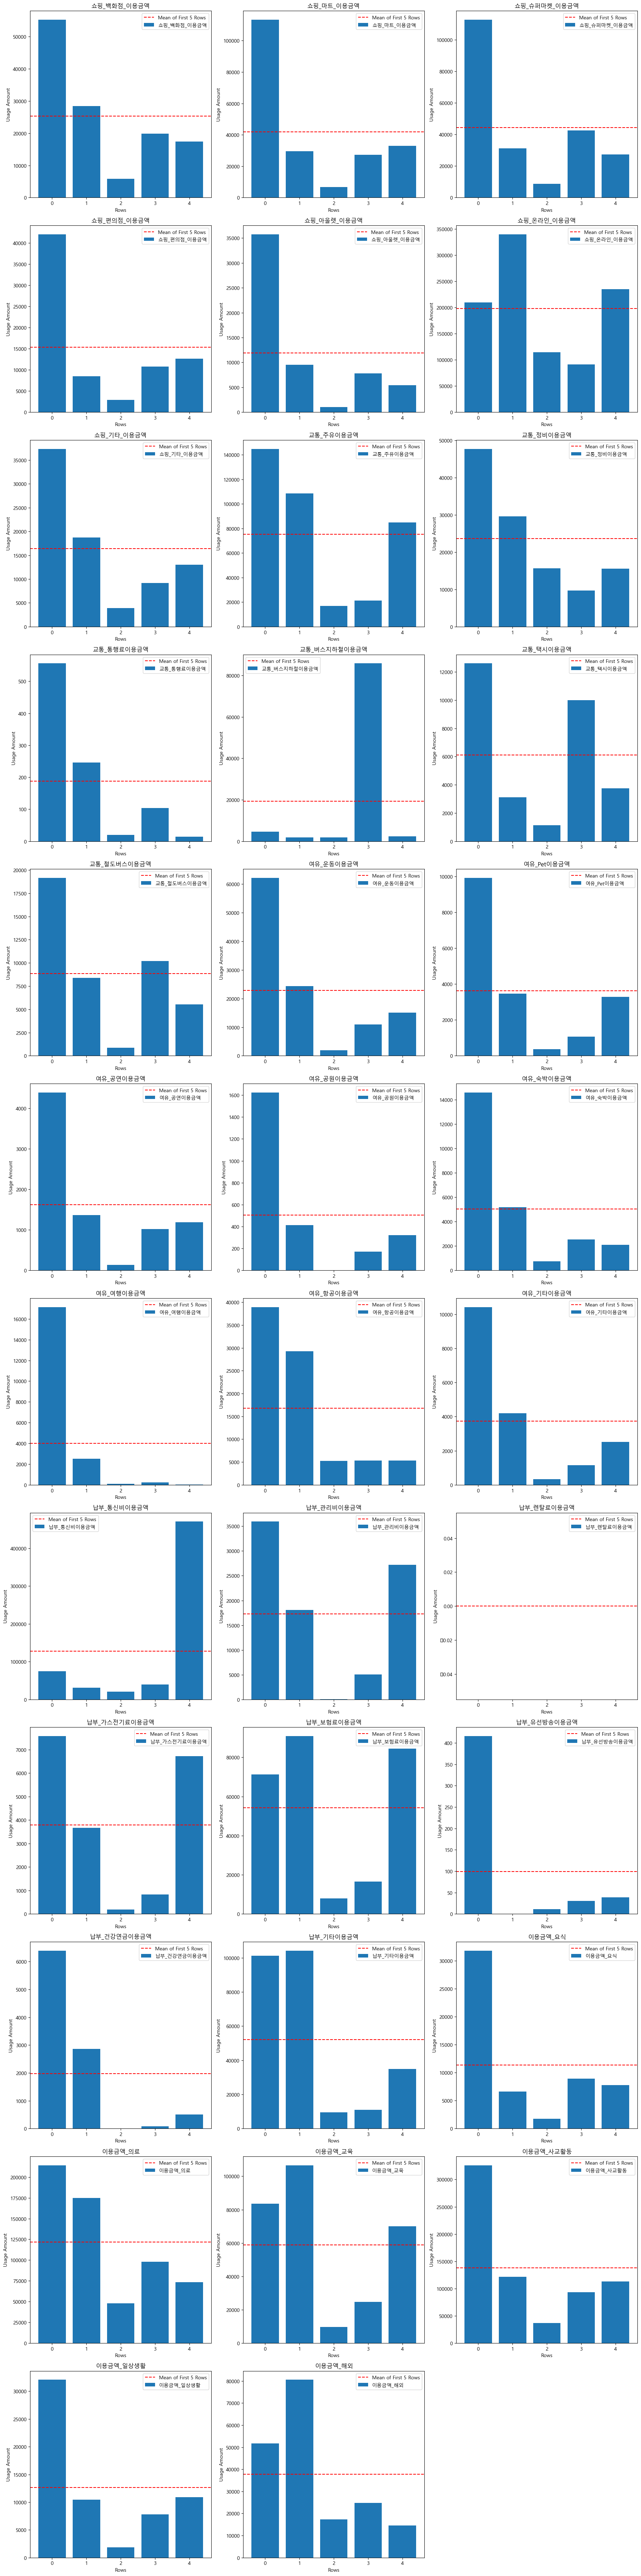

In [18]:
plt.rc('font', family='Malgun Gothic')
# Calculate the mean of the first 5 rows
mean_of_first_5_rows = cluster_mean.iloc[:5, 1:].mean()

# Plotting for each column
num_columns = len(cluster_mean.columns) - 1
num_rows = (num_columns + 2) // 3  # Ceiling division
fig, axes = plt.subplots(num_rows, 3, figsize=(18, 6 * num_rows))

for col_index in range(1, num_columns + 1):
    row = (col_index - 1) // 3
    col = (col_index - 1) % 3
    column_name = cluster_mean.columns[col_index]
    
    ax = axes[row, col]
    ax.bar(range(5), cluster_mean.iloc[:5, col_index], label=column_name)
    ax.axhline(y=mean_of_first_5_rows[col_index - 1], color='r', linestyle='--', label='Mean of First 5 Rows')
    ax.set_xlabel('Rows')
    ax.set_ylabel('Usage Amount')
    ax.set_title(column_name)
    ax.legend()
    ax.set_xticks(range(5))

# Remove any unused subplots
for i in range(num_columns, num_rows * 3):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()

In [37]:
df2_mean=df2.groupby('cluster').mean()
df2_mean

C:\Users\User\AppData\Local\Temp\ipykernel_12688\1768555959.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df2_mean=df2.groupby('cluster').mean()


,Unnamed: 0.1,Unnamed: 0,남녀구분코드,연령,소지여부_신용,입회일자_신용,입회경과개월수_신용,탈회여부,회원여부_연체,수신거부여부_TM,...,Frequency,Monetary,Recency_s,Frequency_s,Monetary_s,labels_k,Recency_8,Frequency_8,Monetary_8,RFM_Score
cluster,,,,,,,,,,,,,,,,,,,,,
0,149950.437261,149950.437261,1.474875,46.233617,0.999118,2.012133e+07,77.877167,0.424919,0.008228,0.340876,...,168.852483,1.058788e+07,0.000759,0.029080,0.002438,1.000000,7.990890,4.763738,5.131355,63.521566
1,147922.848746,147922.848746,1.466492,46.102583,0.998502,2.011317e+07,87.634594,0.446275,0.014976,0.384500,...,143.457507,9.662354e+06,0.002808,0.025211,0.002305,1.000000,7.966305,4.496818,4.985399,60.841105
2,149303.225904,149303.225904,1.464357,46.470884,0.976406,2.011580e+07,84.464357,0.401104,0.046687,0.386546,...,163.474900,6.960748e+06,0.073377,0.028261,0.001917,0.954317,7.313755,4.740964,4.256526,59.453068
3,147800.910581,147800.910581,1.520119,46.713860,0.998510,2.011233e+07,88.690015,0.380030,0.005961,0.307004,...,234.005961,4.170889e+06,0.003477,0.039007,0.001517,1.000000,7.958271,5.470939,3.545455,62.990620
4,149327.318290,149327.318290,1.473476,45.785432,0.999208,2.013757e+07,58.141726,0.473476,0.011085,0.387173,...,146.676960,8.822139e+06,0.000528,0.025701,0.002185,1.000000,7.993666,4.542359,4.977039,61.189475


In [27]:
gender = df2.groupby(['cluster','남녀구분코드']).size().unstack()
gender

남녀구분코드,1,2
cluster,,
0,1787,1616
1,1425,1246
2,1067,925
3,322,349
4,665,598


In [24]:
life_stage=a = df2.groupby(['cluster','Life_Stage']).size().unstack()
life_stage

Life_Stage,1.Single,2.가족형성기,3.자녀출산기,4.자녀성장기(1),5.자녀성장기(2),6.자녀출가기,7.노령
cluster,,,,,,,
0,61,246,301,1132,989,300,374
1,37,156,217,913,743,272,333
2,84,184,192,638,471,175,248
3,16,51,43,130,185,109,137
4,47,166,149,496,316,50,39


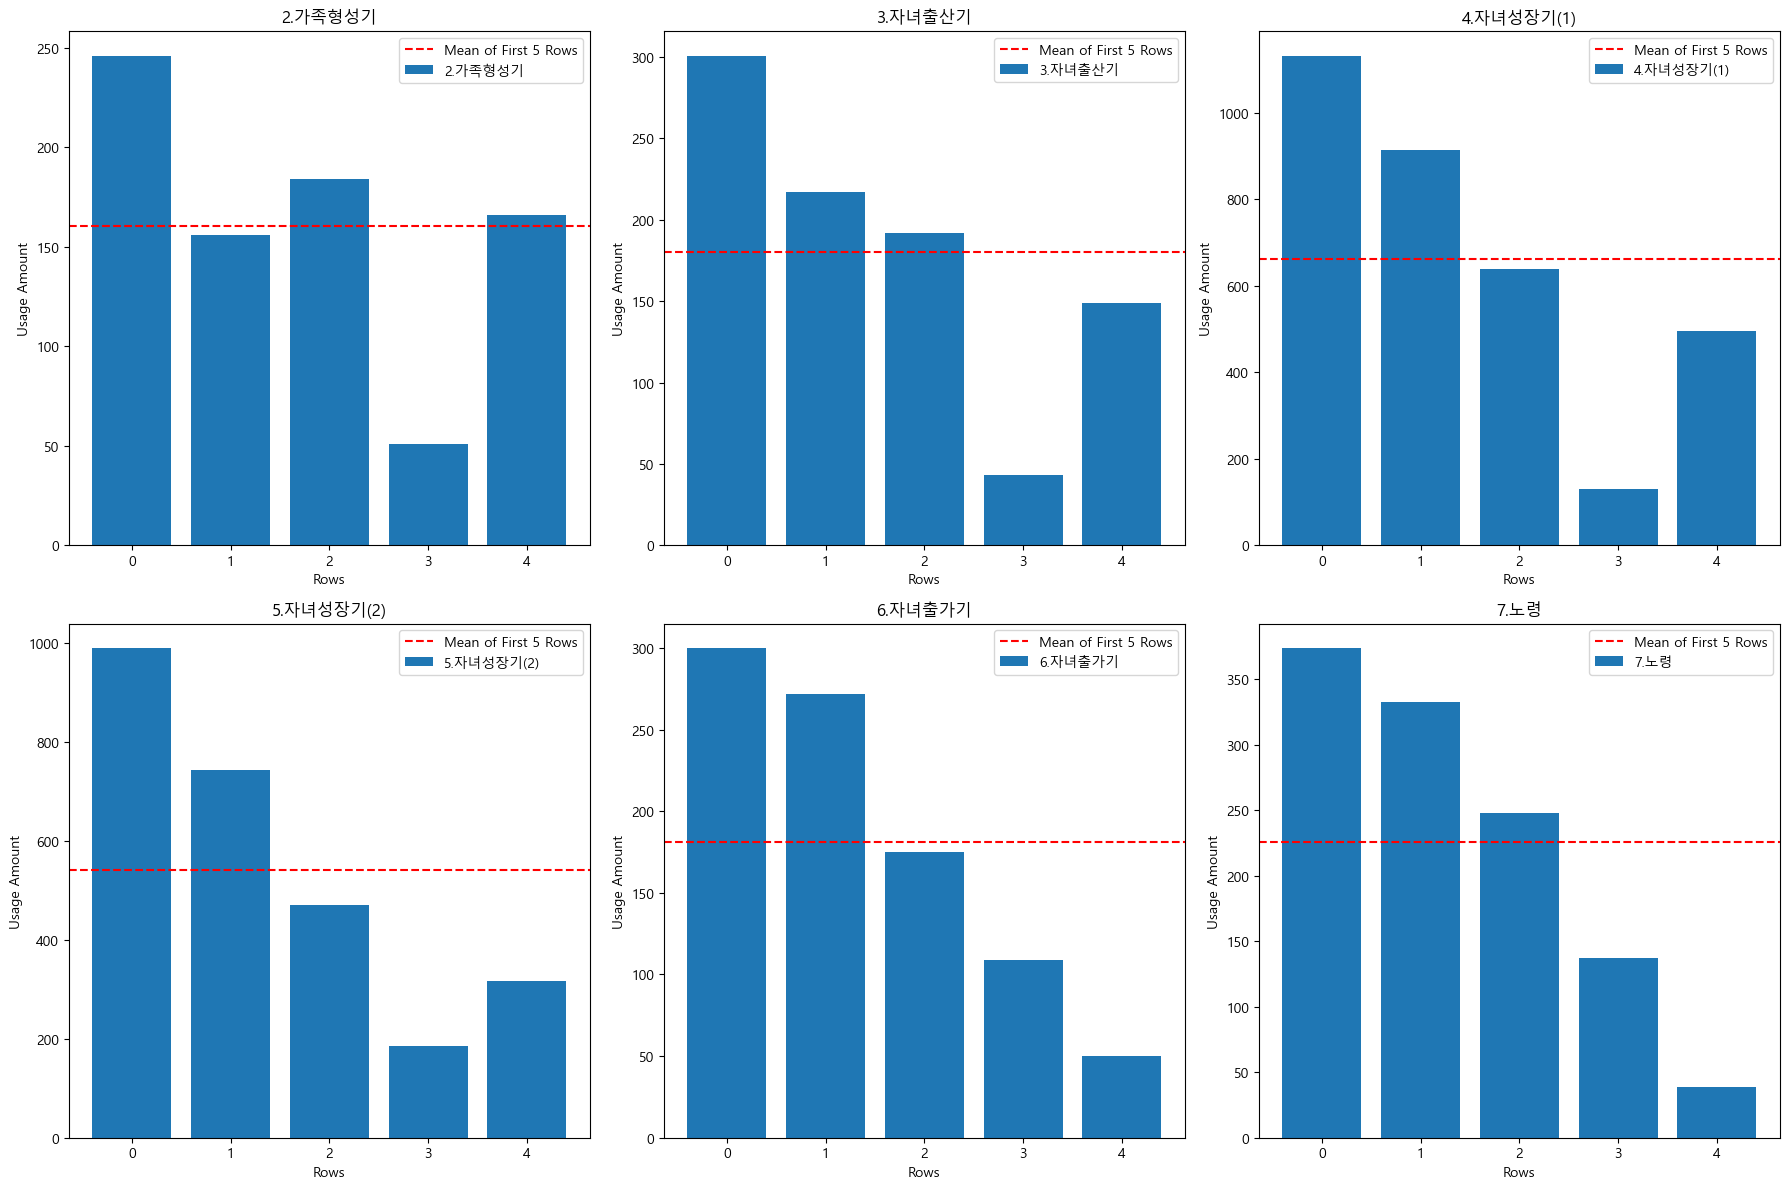

In [25]:
# Calculate the mean of the first 5 rows
mean_of_first_5_rows = life_stage.iloc[:5, 1:].mean()

# Plotting for each column
num_columns = len(life_stage.columns) - 1
num_rows = (num_columns + 2) // 3  # Ceiling division
fig, axes = plt.subplots(num_rows, 3, figsize=(18, 6 * num_rows))

for col_index in range(1, num_columns + 1):
    row = (col_index - 1) // 3
    col = (col_index - 1) % 3
    column_name = life_stage.columns[col_index]
    
    ax = axes[row, col]
    ax.bar(range(5), life_stage.iloc[:5, col_index], label=column_name)
    ax.axhline(y=mean_of_first_5_rows[col_index - 1], color='r', linestyle='--', label='Mean of First 5 Rows')
    ax.set_xlabel('Rows')
    ax.set_ylabel('Usage Amount')
    ax.set_title(column_name)
    ax.legend()
    ax.set_xticks(range(5))

# Remove any unused subplots
for i in range(num_columns, num_rows * 3):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()

# pred_휴면

In [54]:
new_=df[df['prediction']=='휴면']
new_df=new_[[  '쇼핑_도소매_이용금액','쇼핑_백화점_이용금액' , '쇼핑_마트_이용금액',  '쇼핑_슈퍼마켓_이용금액' ,'쇼핑_편의점_이용금액' , '쇼핑_아울렛_이용금액' , '쇼핑_온라인_이용금액' , 
'쇼핑_기타_이용금액' ,   '교통_주유이용금액' ,'교통_정비이용금액' ,'교통_통행료이용금액' ,'교통_버스지하철이용금액'  ,'교통_택시이용금액' ,
'교통_철도버스이용금액' ,'여유_운동이용금액', '여유_Pet이용금액' , '여유_공연이용금액' ,'여유_공원이용금액' ,'여유_숙박이용금액' ,
'여유_여행이용금액' ,'여유_항공이용금액' ,'여유_기타이용금액' , '납부_통신비이용금액' ,'납부_관리비이용금액' ,'납부_렌탈료이용금액' ,
'납부_가스전기료이용금액'  ,'납부_보험료이용금액' ,'납부_유선방송이용금액' ,'납부_건강연금이용금액' ,'납부_기타이용금액' ,'이용금액_요식',  '이용금액_의료',  
 '이용금액_교육' ,'이용금액_사교활동', '이용금액_일상생활' ,'이용금액_해외']]

In [55]:
df3=df3.drop(['cluster'],axis=1)

KeyError: "['cluster'] not found in axis"

In [56]:
new_cosine_sim = cosine_similarity(new_df, df3)
# 클러스터링을 통해 군집화
new_predict = pd.DataFrame(km.predict(new_cosine_sim))
new_predict.columns = ['Cluster']
new_predict

,Cluster
0,0
1,1
2,1
3,4
4,4
...,...
14437,1
14438,4
14439,1
14440,4


In [57]:
new_predict.value_counts()

Cluster
1          7947
0          4853
4          1460
3           182
dtype: int64

In [58]:
new_df['cluster']=new_predict['Cluster'].values
new_df

C:\Users\User\AppData\Local\Temp\ipykernel_12688\876178047.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['cluster']=new_predict['Cluster'].values


,쇼핑_도소매_이용금액,쇼핑_백화점_이용금액,쇼핑_마트_이용금액,쇼핑_슈퍼마켓_이용금액,쇼핑_편의점_이용금액,쇼핑_아울렛_이용금액,쇼핑_온라인_이용금액,쇼핑_기타_이용금액,교통_주유이용금액,교통_정비이용금액,...,납부_유선방송이용금액,납부_건강연금이용금액,납부_기타이용금액,이용금액_요식,이용금액_의료,이용금액_교육,이용금액_사교활동,이용금액_일상생활,이용금액_해외,cluster
8,28520,0,0,0,160700,0,0,0,75000,0,...,0,0,0,0,14000,0,175000,0,0,0
17,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1623000,0,0,0,1
28,246220,0,0,0,0,307620,0,0,0,0,...,0,0,19400,0,0,0,24000,0,0,1
35,0,0,0,0,0,0,73000,0,0,78950,...,0,0,0,0,0,0,0,0,0,4
42,0,0,0,0,0,0,0,0,30075,0,...,0,0,0,0,0,0,0,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69375,0,0,0,0,0,0,4000000,0,50000,0,...,0,0,0,0,0,0,24000,0,0,1
69377,0,0,63870,0,0,0,0,0,20000,0,...,0,0,0,0,0,0,87000,0,0,4
69381,0,0,0,0,0,0,0,0,0,0,...,0,0,2700,0,0,0,0,0,0,1
69382,79000,0,0,38170,72000,0,0,0,99000,0,...,0,0,2700,6900,10700,0,30500,0,0,4


In [59]:
from scipy import stats
results = [] 

for i in range(5):
    # cluster 칼럼 값이 i인 행들 필터링
    cluster_i_rows = df2[df2['cluster'] == i]

    # _1순위카드 칼럼의 최빈값 구하기
    mode_card = stats.mode(cluster_i_rows['_1순위카드ID'])[0][0]

    # 두 번째로 많이 사용하는 카드 구하기
    card_value_counts = cluster_i_rows['_1순위카드ID'].value_counts()
    second_mode_card = card_value_counts.index[1] if len(card_value_counts) > 1 else np.nan

    # 세 번째부터 60순위까지 사용하는 카드 구하기
    remaining_cards = card_value_counts.index[2:70] if len(card_value_counts) > 2 else []
    
    results.append([i, mode_card, second_mode_card] + list(remaining_cards))

# 결과를 데이터프레임으로 변환
result_df = pd.DataFrame(results, columns=['cluster', '1순위', '2순위'] + [f'{i}순위' for i in range(3, 71)])
result_df.set_index('cluster', inplace=True)

result_df

C:\Users\User\AppData\Local\Temp\ipykernel_12688\4198348079.py:9: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_card = stats.mode(cluster_i_rows['_1순위카드ID'])[0][0]
C:\Users\User\AppData\Local\Temp\ipykernel_12688\4198348079.py:9: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid

,1순위,2순위,3순위,4순위,5순위,6순위,7순위,8순위,9순위,10순위,...,61순위,62순위,63순위,64순위,65순위,66순위,67순위,68순위,69순위,70순위
cluster,,,,,,,,,,,,,,,,,,,,,
0,229,136,216,156,482,1561,226,1558,135,1555,...,1326,284,487,260,332,321,1515,163,1536,157
1,136,229,156,482,299,1558,1561,135,216,1555,...,260,793,321,488,1325,246,1605,355,1127,101
2,136,1739,156,229,1561,126,1558,1555,1077,216,...,931,487,107,101,1147,1731,1088,143,1536,1142
3,136,156,1561,1555,229,226,126,311,492,218,...,838,1086,938,1731,244,1088,834,247,797,500
4,229,216,482,226,156,295,297,135,126,136,...,1007,144,1142,1493,931,301,120,317,1325,187


In [62]:
new_['cluster']=new_predict['Cluster'].values
new=new_[['회원번호','_1순위카드ID','cluster']]
new.head()

C:\Users\User\AppData\Local\Temp\ipykernel_12688\853056276.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_['cluster']=new_predict['Cluster'].values


,회원번호,_1순위카드ID,cluster
8,sytxTIWe,136,0
17,qJVMhX52,1068,1
28,jJpomaur,487,1
35,M6X9TldS,302,4
42,8CpoNiZA,156,4


In [63]:
merged_df = pd.merge(new, result_df, on='cluster')
merged_df.head()

,회원번호,_1순위카드ID,cluster,1순위,2순위,3순위,4순위,5순위,6순위,7순위,...,61순위,62순위,63순위,64순위,65순위,66순위,67순위,68순위,69순위,70순위
0,sytxTIWe,136,0,229,136,216,156,482,1561,226,...,1326,284,487,260,332,321,1515,163,1536,157
1,lFYWhHJU,324,0,229,136,216,156,482,1561,226,...,1326,284,487,260,332,321,1515,163,1536,157
2,aD26XDLb,126,0,229,136,216,156,482,1561,226,...,1326,284,487,260,332,321,1515,163,1536,157
3,wJ72pDTK,136,0,229,136,216,156,482,1561,226,...,1326,284,487,260,332,321,1515,163,1536,157
4,Lu0L3wvX,1514,0,229,136,216,156,482,1561,226,...,1326,284,487,260,332,321,1515,163,1536,157


In [71]:
def find_similar_consumption_pattern(member_id, merged_df):
    # 회원 번호로부터 클러스터 찾기
    member_cluster = merged_df.loc[merged_df['회원번호'] == member_id, 'cluster'].values[0]
    
    if member_cluster == -1:
        return "User not found in any cluster."
    
    # 같은 클러스터 내의 회원들 찾기
    similar_members = merged_df[merged_df['cluster'] == member_cluster]
    # 회원의 현재 사용카드 구하기
    current_cards = similar_members[similar_members['회원번호'] == member_id]['_1순위카드ID'].values[0]
    
    # 주사용카드 1순위, 2순위, 3순위 구하기
    top_cards = similar_members[['1순위', '2순위', '3순위']].mode().iloc[0]
    
    # 결과 문자열 생성
    result = f"User {member_id}'s current usage cards:\n"
    result += f"Current card: {current_cards}\n\n"
    result += f"Top cards for users with similar consumption patterns:\n"
    result += f"1st choice: {top_cards['1순위']}\n"
    result += f"2nd choice: {top_cards['2순위']}\n"
    result += f"3rd choice: {top_cards['3순위']}"
    
    return result

# 예시 사용
member_id = 'sytxTIWe'  # 입력하려는 회원 번호
result = find_similar_consumption_pattern(member_id, merged_df)
print(result)


User sytxTIWe's current usage cards:
Current card: 136

Top cards for users with similar consumption patterns:
1st choice: 229
2nd choice: 136
3rd choice: 216


In [72]:
rank_columns = [f'{i}순위' for i in range(1, 6)]

# apply 함수를 사용하여 조건을 만족하는 행을 찾고, 그 합을 계산
a = merged_df.apply(lambda row: row['_1순위카드ID'] in row[rank_columns].values, axis=1).sum()
a

2238

In [76]:
rank_columns = [f'{i}순위' for i in range(1, 6)]

# apply 함수를 사용하여 조건을 만족하는 행을 찾고, 그 합을 계산
b = merged_df[merged_df.apply(lambda row: row['_1순위카드ID'] not in row[rank_columns].values, axis=1)]
b

,회원번호,_1순위카드ID,cluster,1순위,2순위,3순위,4순위,5순위,6순위,7순위,...,61순위,62순위,63순위,64순위,65순위,66순위,67순위,68순위,69순위,70순위
1,lFYWhHJU,324,0,229,136,216,156,482,1561,226,...,1326,284,487,260,332,321,1515,163,1536,157
2,aD26XDLb,126,0,229,136,216,156,482,1561,226,...,1326,284,487,260,332,321,1515,163,1536,157
4,Lu0L3wvX,1514,0,229,136,216,156,482,1561,226,...,1326,284,487,260,332,321,1515,163,1536,157
5,M6NTNL4U,111,0,229,136,216,156,482,1561,226,...,1326,284,487,260,332,321,1515,163,1536,157
6,p3tfgTqx,1141,0,229,136,216,156,482,1561,226,...,1326,284,487,260,332,321,1515,163,1536,157
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14437,iWtMfNBg,126,3,136,156,1561,1555,229,226,126,...,838,1086,938,1731,244,1088,834,247,797,500
14438,6PsR2Eya,305,3,136,156,1561,1555,229,226,126,...,838,1086,938,1731,244,1088,834,247,797,500
14439,mF1zDjdZ,126,3,136,156,1561,1555,229,226,126,...,838,1086,938,1731,244,1088,834,247,797,500
14440,tKVR0fnT,791,3,136,156,1561,1555,229,226,126,...,838,1086,938,1731,244,1088,834,247,797,500
